<a href="https://colab.research.google.com/github/YomarPeralta/ModelosProyectoAire/blob/main/TecnicaRNN_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
filename = "Dataset_Aire_14197.csv"
data = pandas.read_csv(filename, header=0)
#print(data.head(100))
#trainy=data['locationId']
#print(trainy.head(100))

In [3]:
data_sc=data.drop("country",axis=1)
data_sc=data_sc.drop("utc",axis=1)
data_sc=data_sc.drop("location",axis=1)
data_sc=data_sc.drop("city",axis=1)
data_sc=data_sc.drop("unit",axis=1)
data_sc=data_sc.drop("latitude",axis=1)
data_sc=data_sc.drop("longitude",axis=1)
data_sc=data_sc.drop("local",axis=1)
print(data_sc.head(15))
X = data_sc.iloc[:, [0,2]].values
print(X)
Y = data_sc.iloc[:,[1,2] ].values
print(Y[1:15:])
labelencoder_X2 = LabelEncoder()
Y[:,0] = labelencoder_X2.fit_transform(Y[:,0])
print(Y[1:15:])

    locationId parameter      value
0        42641      pm25  11.270000
1        42641       no2  64.400722
2        42644      pm25   9.436000
3        42643        co   0.669755
4        42645       no2   8.221209
5        42647      pm25   0.000000
6        42643      pm25  29.289000
7        42646       no2  41.346738
8        42642        co   0.658695
9        42644       no2  43.539311
10       42648       so2   4.675383
11       42643       no2   5.483313
12       42647      pm10   0.000000
13       42642       so2   5.279586
14       42641       so2   5.098069
[[4.26410000e+04 1.12700000e+01]
 [4.26410000e+04 6.44007225e+01]
 [4.26440000e+04 9.43600000e+00]
 ...
 [4.26480000e+04 5.61470737e+00]
 [4.26480000e+04 2.63464388e-01]
 [4.26440000e+04 2.17630000e+01]]
[['no2' 64.40072245176]
 ['pm25' 9.436]
 ['co' 0.669755051]
 ['no2' 8.22120878764]
 ['pm25' 0.0]
 ['pm25' 29.289]
 ['no2' 41.34673806556]
 ['co' 0.658695317]
 ['no2' 43.53931113198]
 ['so2' 4.675383412364]
 ['no2' 5.4833

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("Churn_Modelling",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [0]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

Y = transformer.fit_transform(Y)
print(Y[1:15:])
Y=Y[:,0:5]
print(Y[1:15:])


[[0.0 1.0 0.0 0.0 0.0 64.40072245176]
 [0.0 0.0 0.0 1.0 0.0 9.436]
 [1.0 0.0 0.0 0.0 0.0 0.669755051]
 [0.0 1.0 0.0 0.0 0.0 8.22120878764]
 [0.0 0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0 29.289]
 [0.0 1.0 0.0 0.0 0.0 41.34673806556]
 [1.0 0.0 0.0 0.0 0.0 0.658695317]
 [0.0 1.0 0.0 0.0 0.0 43.53931113198]
 [0.0 0.0 0.0 0.0 1.0 4.675383412364]
 [0.0 1.0 0.0 0.0 0.0 5.48331308892]
 [0.0 0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 5.279586162628]
 [0.0 0.0 0.0 0.0 1.0 5.098068720276]]
[[0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [1.0 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 1.0 0.0 0.0 0.0]
 [1.0 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0]
 [0.0 1.0 0.0 0.0 0.0]
 [0.0 0.0 1.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0]
 [0.0 0.0 0.0 0.0 1.0]]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sX = StandardScaler()
X_train = sX.fit_transform(X_train)
X_test = sX.transform(X_test)

In [6]:
#construimos nuestra red neuronal
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from keras.layers import add
from keras.layers import Activation
from keras.layers import GRU

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add((Dense(5, activation='sigmoid')))
#model.compile(loss='mean_squared_error', optimizer='rmsprop')


model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
model.fit(X_train, Y_train, batch_size = 10, epochs = 50)

Epoch 1/50
1136/1136 [==============================] - 3s 2ms/step - loss: 0.3778 - accuracy: 0.6181
Epoch 2/50
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2603 - accuracy: 0.7647
Epoch 3/50
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2215 - accuracy: 0.7935
Epoch 4/50
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2095 - accuracy: 0.8043
Epoch 5/50
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2024 - accuracy: 0.8045
Epoch 6/50
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1968 - accuracy: 0.8092
Epoch 7/50
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1916 - accuracy: 0.8120
Epoch 8/50
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1887 - accuracy: 0.8153
Epoch 9/50
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1857 - accuracy: 0.8149
Epoch 10/50
1136/1136 [==============================] - 2s 2ms/step - loss: 0.183

In [7]:
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)
accuracy=model.evaluate(X_test,Y_test)
print(accuracy)
y_pred = model.predict(X_test)
y_pred = np.asarray(y_pred).astype(np.float32)
y_pred=np.round(y_pred)
print(y_pred[0:15,])
print(Y_test[0:15,])
y_test = []
Y_pred = []
for x in Y_test:
  if(x[0]==1 and x[1]==0 and x[2]==0 and x[3]==0 and x[4]==0):
    y_test.append('pm25')
  if(x[0]==0 and x[1]==1 and x[2]==0 and x[3]==0 and x[4]==0):
    y_test.append('no2')
  if(x[0]==0 and x[1]==0 and x[2]==1 and x[3]==0 and x[4]==0):
    y_test.append('pm10')
  if(x[0]==0 and x[1]==0 and x[2]==0 and x[3]==1 and x[4]==0):
    y_test.append('co')
  if(x[0]==0 and x[1]==0 and x[2]==0 and x[3]==0 and x[4]==1):
    y_test.append('so2')
for x in y_pred:
  if(x[0]==1 and x[1]==0 and x[2]==0 and x[3]==0 and x[4]==0):
    Y_pred.append('pm25')
  if(x[0]==0 and x[1]==1 and x[2]==0 and x[3]==0 and x[4]==0):
    Y_pred.append('no2')
  if(x[0]==0 and x[1]==0 and x[2]==1 and x[3]==0 and x[4]==0):
    Y_pred.append('pm10')
  if(x[0]==0 and x[1]==0 and x[2]==0 and x[3]==1 and x[4]==0):
    Y_pred.append('co')
  if(x[0]==0 and x[1]==0 and x[2]==0 and x[3]==0 and x[4]==1):
    Y_pred.append('so2')
print(Y_pred[0:15])
print(y_test[0:15])

89/89 [==============================] - 0s 2ms/step - loss: 0.1514 - accuracy: 0.8415
[0.15141914784908295, 0.841549277305603]
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
['pm10', 'pm25', 'so2', 'pm25', 'pm25', 'co', 'so2', 'so2', 'so2', 'co', 'so2', 'so2', 'pm25', 'so2', 'pm25']
['co', 'pm25', 'so2', 'pm25', 'pm25', 'co', 'so2', 'co', 'so2', 'co', 'co', 'so2', 'co', 'pm25', 'so2']


In [8]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
# create a confusion matrix to visually represent incorrectly classified images
def plot_confusion_matrix(y_true, y_pred, classes, out_path=""):
    cm = confusion_matrix(y_true, y_pred,normalize="true")
    df_cm = pd.DataFrame(cm, index=[i for i in classes], columns=[i for i in classes])
    plt.figure(figsize=(6, 6))
    ax = sn.heatmap(df_cm, annot=True, square=True, linewidths=.2,cmap="YlGnBu" ,cbar_kws={"shrink": 0.8})
    return ax

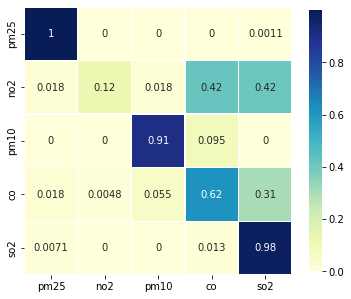

In [9]:
y_pred=model.predict(X_test)
labels=['pm25','no2','pm10','co','so2']
plot_confusion_matrix(Y_test.argmax(axis=1),y_pred.argmax(axis=1),labels)